### Import Necessary Libraries

In [1]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# NLP
import nltk


In [2]:
df = pd.read_csv('../data/raw/spam.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## Data Cleaning

Removing unwanted columns

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5, random_state=42)

,v1,v2
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,ham,I sent my scores to sophas and i had to do sec...
1044,spam,We know someone who you know that fancies you....
2484,ham,Only if you promise your getting out as SOON a...
812,spam,Congratulations ur awarded either å£500 of CD ...


Rename columns

In [9]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5, random_state=42)

,target,text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,ham,I sent my scores to sophas and i had to do sec...
1044,spam,We know someone who you know that fancies you....
2484,ham,Only if you promise your getting out as SOON a...
812,spam,Congratulations ur awarded either å£500 of CD ...


Check for Missing Values

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

Check for Duplicated Values

In [11]:
df.duplicated().sum()

403

Remove duplicates

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

We are done with data cleaning. Note that some kind of preprocessing has already been done to this dataset. That's why we only had to do basic data cleaning. 

## Exploratory Data Analysis

It is one of the first steps that is to be performed before we build our machine learning models.

In [15]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

In [16]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


There are only two classes. Therefore, we can use very simple mapping function to encode them into numbers. 0 -> ham and 1 -> spam before feeding it into ML Algorithm.

In [17]:
fig = px.histogram(df, x='target', color='target', title='Count for target')
fig.update_layout(bargap=0.2)

We can see that the dataset is imbalanced.

For deeper analysis, we will be adding new features:
- Number of characters - `num_chars`.
- Number of words - `num_words`.
- Number of sentences - `num_sentences`.

In [18]:
# nltk.download('punkt')

In [19]:
df['num_chars'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Now we can perform EDA on these new numerical features.

In [21]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


- Maximum number of characters a sms message consists of is 910. On average, each message consists of almost 79 characters.
- Maximum number of words are 220 and average is 18.
- Maximum number of sentences are 38 and average is 2.

The maximum values for each of these features indicate outlier sms message. For further exploration in depth, we can analyze these new three features for non-spam message `ham` and spam message `spam` separately. 

In [22]:
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [23]:
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [24]:
px.histogram(df, x='num_chars', color='target', title='Distribution of number of characters')

In [25]:
px.histogram(df, x='num_words', color='target', title='Distribution of number of words')

In [26]:
px.histogram(df, x='num_sentences', color='target', title='Distribution of number of sentences')

From our graphs, we can see that outliers are present which can have impact in our model. So we will be treating it in a later stage.

In [27]:
fig = px.scatter_matrix(df,
    dimensions=["num_sentences", "num_chars", "num_words"],
    color="target")
fig.show()

/Users/isham993/mambaforge/envs/movie_sentiment_analysis/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



For correlation matrix, lets encode the target variable to numerical form. 

In [28]:
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

/var/folders/wh/t7k8b0897kv58vlclsc1_0xh0000gn/T/ipykernel_78073/4277794465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

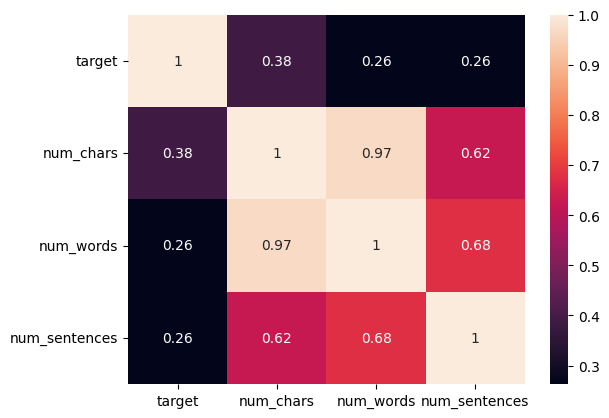

In [29]:
sns.heatmap(df.corr(),annot=True)

There is high co-linearity between:
- `num_sentences` and `num_chars`
- `num_sentences` and `num_words`
- `num_chars` and `num_words`

Therefore, we will have to drop two of these columns out of three and keep only one column. So, we will keep `num_chars`.

In [31]:
df.drop(columns=['num_words', 'num_sentences'], inplace=True)

In [32]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


As our dataset is modified, lets save its version. Since it is not final, we will save it in data/raw directory only.

In [34]:
df.to_csv('../data/processed/spam_v2.csv', index=False)

Now that we have basic understanding of data, we are ready to perform preprocessing on the data.